In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris() #iris dataset 

# Selecting the first two features (sepal length and sepal width)
X = iris.data[:, :2]
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Train a decision tree classifier without pruning
clf = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [4]:
# Train a decision tree classifier without pruning
clf = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

In [5]:
# Train a decision tree classifier without pruning
clf = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)


In [6]:
# Calculate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:",  accuracy)

Testing Accuracy: 0.6666666666666666


In [7]:

# Define a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [8]:
# Predict the output for each point in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


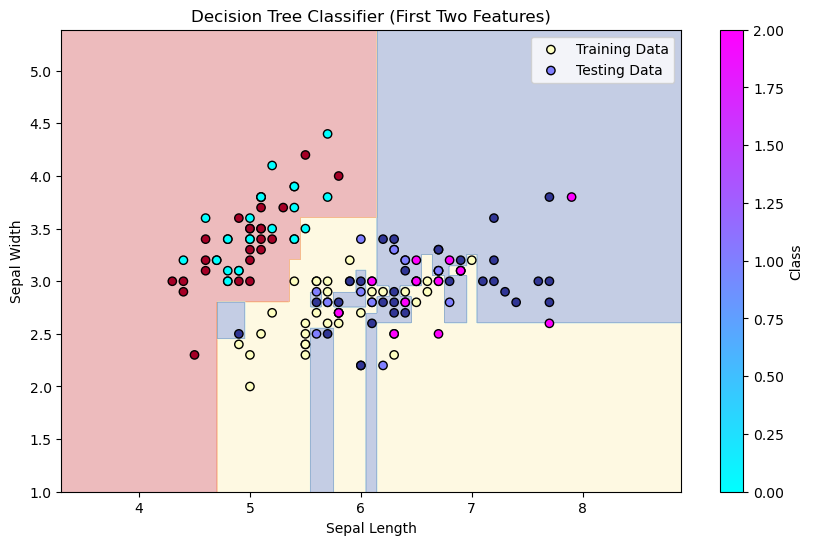

In [9]:
# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdYlBu, label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.cool, label='Testing Data')
plt.title("Decision Tree Classifier (First Two Features)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.colorbar(label="Class")
plt.legend()
plt.show()

Testing Accuracy (With Pre-Pruning): 0.76


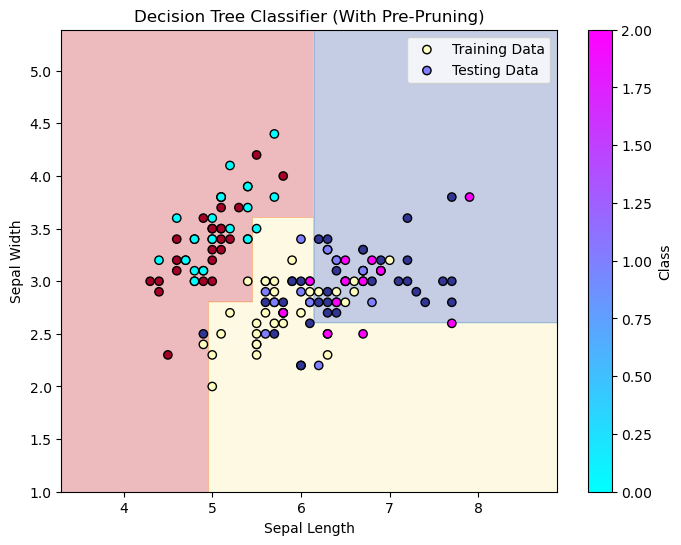

In [10]:
# with pruning 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset and split
X, y = load_iris(return_X_y=True)
X = X[:, :2]  # Using only the first two features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree with pre-pruning
prune_params = {'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 2}
clf_prune = DecisionTreeClassifier(random_state=42, **prune_params)
clf_prune.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_prune = clf_prune.predict(X_test)
accuracy_prune = accuracy_score(y_test, y_pred_prune)
print(f"Testing Accuracy (With Pre-Pruning): {accuracy_prune:.2f}")

# Define a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))

# Plot the decision boundary
plt.figure(figsize=(8, 6))
Z = clf_prune.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdYlBu, label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.cool, label='Testing Data')
plt.title("Decision Tree Classifier (With Pre-Pruning)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.colorbar(label="Class")
plt.legend()
plt.show()


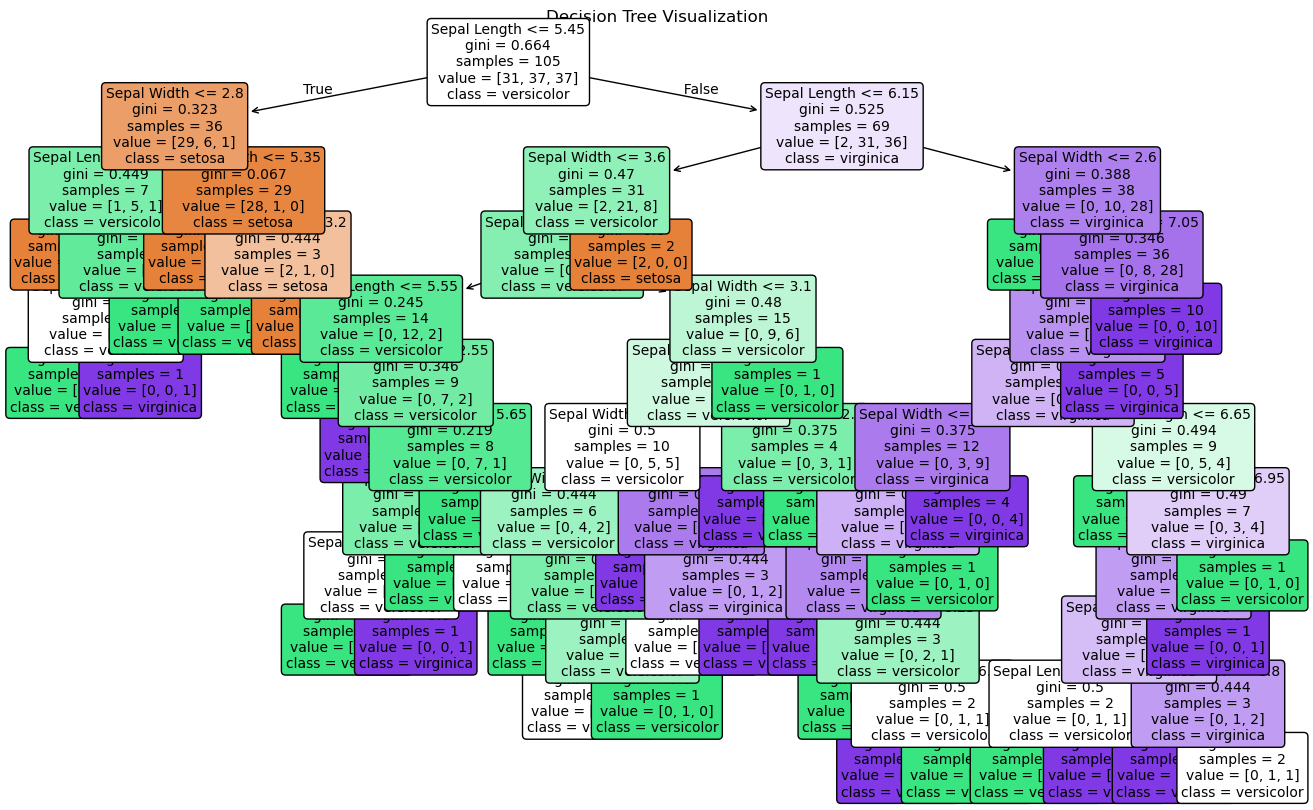

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=
           
           (16, 10))
plot_tree(clf, 
          feature_names=["Sepal Length", "Sepal Width"], 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()
